In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pytrends.request import TrendReq

columns = ['City', 'Big Data Job Offers', 'Data Science Job Offers', 'Machine Learning Job Offers']
europe_cities = {}
latam_cities = {}
usa_cities = {}

In [259]:
req1 = TrendReq()
req1.build_payload(kw_list=['big data', 'data science', 'machine learning'])

trends = req1.interest_by_region('CITY')
trendy = trends.drop(trends[(trends['big data'] == 0) & (trends['data science'] == 0) & (trends['machine learning'] == 0)].index)
trendy.sort_index()

,big data,data science,machine learning
geoName,,,
Bangkok,55,18,27
Barcelona,66,11,23
Bengaluru,42,21,37
Berlin,47,16,37
Bogotá,70,8,22
Chennai,53,18,29
Chicago,34,33,33
Diadema,69,12,19
Gurgaon,44,21,35


In [113]:
trends.drop(trends[(trends['big data'] != 0) & (trends['data science'] != 0) & (trends['machine learning'] != 0)].index).sort_index()

,big data,data science,machine learning
geoName,,,
Ahmedabad,0,0,0
Amsterdam,0,0,0
Atlanta,0,0,0
Auckland,0,0,0
Austin,0,0,0
Boston,0,0,0
Brisbane,0,0,0
Brussels,0,0,0
Bucharest,0,0,0


In [114]:
def buildDic(dic, filename):
    f = open(filename, 'r')
    for line in f:
        data = line.strip().split(",")
        city = data[0]
        job_offer = data[1]
        total_count = float(data[2])
        if city not in dic:
            dic[city] = {}
        dic[city][job_offer] = total_count

In [115]:
buildDic(europe_cities,"data/europe.csv")
buildDic(latam_cities, "data/latinAmerica.csv")
buildDic(usa_cities,"data/usa.csv")

In [116]:
def addRows(df, dic):
    for k, v in dic.items():
        df2 = pd.DataFrame(data=[[k, v['Big Data'], v['Data Science'], v['Machine Learning']]], columns=columns)
        df = df.append(df2, ignore_index=True)
    df.index = [(i+1) for i in range(len(dic))]
    return df

In [117]:
def total(df):
    df['Total New Tech Job Offers'] = df.apply(lambda x: x[columns[1]] + x[columns[2]] + x[columns[3]], axis=1)

In [118]:
maindf = pd.DataFrame(columns=columns)

In [119]:
europedf = pd.DataFrame(columns=columns)
europedf = addRows(europedf, europe_cities)

In [120]:
usadf = pd.DataFrame(columns=columns)
usadf = addRows(usadf, usa_cities)

In [121]:
latamdf = pd.DataFrame(columns=columns)
latamdf = addRows(latamdf, latam_cities)

In [122]:
maindf = maindf.append([europedf, usadf, latamdf], ignore_index=True)
maindf = maindf.sort_values('City')
maindf = maindf.reset_index(drop=True)
total(maindf)

In [123]:
maindf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
0,Amsterdam,1318.0,1273.0,516.0,3107.0
1,Atlanta,1599.0,265.0,371.0,2235.0
2,Austin,938.0,349.0,517.0,1804.0
3,Barcelona,435.0,354.0,174.0,963.0
4,Belo Horizonte,15.0,11.0,11.0,37.0
5,Berlin,995.0,1011.0,667.0,2673.0
6,Bogota,61.0,64.0,11.0,136.0
7,Boston,2234.0,6702.0,1271.0,10207.0
8,Brasilia,8.0,6.0,3.0,17.0
9,Brussels,717.0,925.0,221.0,1863.0


In [124]:
total(europedf)
total(latamdf)
total(usadf)

In [125]:
europedf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Amsterdam,1318.0,1273.0,516.0,3107.0
2,Barcelona,435.0,354.0,174.0,963.0
3,Berlin,995.0,1011.0,667.0,2673.0
4,Brussels,717.0,925.0,221.0,1863.0
5,Budapest,274.0,354.0,80.0,708.0
6,Cardiff,57.0,107.0,28.0,192.0
7,Copenhagen,132.0,268.0,126.0,526.0
8,Dublin,570.0,1191.0,242.0,2003.0
9,Estambul,98.0,155.0,31.0,284.0
10,Stockholm,340.0,394.0,213.0,947.0


In [126]:
latamdf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Belo Horizonte,15.0,11.0,11.0,37.0
2,Bogota,61.0,64.0,11.0,136.0
3,Brasilia,8.0,6.0,3.0,17.0
4,Buenos Aires,185.0,187.0,155.0,527.0
5,Cali,1.0,8.0,0.0,9.0
6,Guadalajara,175.0,167.0,82.0,424.0
7,Lima,26.0,18.0,15.0,59.0
8,Medellin,6.0,9.0,0.0,15.0
9,Mexico City,190.0,234.0,49.0,473.0
10,Monterrey,30.0,60.0,12.0,102.0


In [261]:
usadf
print(usadf.iloc[:,0:1])


             City
1         Atlanta
2          Austin
3          Boston
4         Chicago
5          Dallas
6         Houston
7     Los Angeles
8        New York
9   San Francisco
10        Seattle
11     Washington


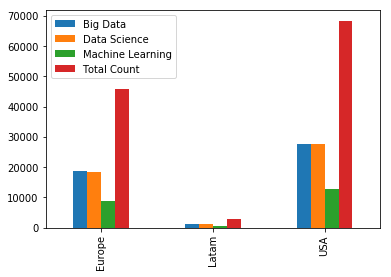

In [128]:
compdf = pd.DataFrame(index=['Europe','Latam','USA'], columns=['Big Data','Data Science','Machine Learning','Total Count'])
compdf.loc['Europe'] = [europedf[columns[1]].sum(),europedf[columns[2]].sum(),europedf[columns[3]].sum(),europedf.iloc[:,-1].sum()]
compdf.loc['Latam'] = [latamdf[columns[1]].sum(),latamdf[columns[2]].sum(),latamdf[columns[3]].sum(),latamdf.iloc[:,-1].sum()]
compdf.loc['USA'] = [usadf[columns[1]].sum(),usadf[columns[2]].sum(),usadf[columns[3]].sum(),usadf.iloc[:,-1].sum()]
compdf.plot.bar()

In [129]:
compdf

,Big Data,Data Science,Machine Learning,Total Count
Europe,18608,18424,8971,46003
Latam,1186,1214,557,2957
USA,27826,27723,12940,68489


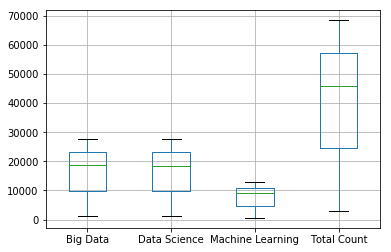

In [130]:
boxplot = compdf.boxplot()

In [131]:
gdp = pd.read_csv('data/cities_gdp.csv')

In [132]:
gdp = gdp.drop(columns=['METRO_ID','Variables','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])

In [133]:
gdp = gdp.sort_values(by='Metropolitan areas')

In [134]:
gdp.head()

,Metropolitan areas,VAR,Year,Value
2545,Aachen,GDP_PC,2002,30473.22
2522,Aachen,GDP,2005,17947.14
2523,Aachen,GDP,2006,18428.38
2524,Aachen,GDP,2007,19001.91
2525,Aachen,GDP,2008,19294.57


In [135]:
gdp_df = gdp.loc[(gdp['VAR'] == 'GDP') & (gdp['Year'] == 2012)]
gdp_df = gdp_df.reset_index(drop=True)
gdp_df = gdp_df.drop(columns=['VAR','Year'])

In [136]:
gdp_pc_df = gdp.loc[(gdp['VAR'] == 'GDP_PC') & (gdp['Year'] == 2012)]
gdp_pc_df = gdp_pc_df.reset_index(drop=True)
gdp_pc_df = gdp_pc_df.drop(columns=['VAR','Year'])

In [137]:
gdp_df.columns = ['City','GDP']

In [138]:
gdp_pc_df.columns = ['City','GDP per Capita']

In [139]:
gdp_df.head()

,City,GDP
0,Aachen,19496.51
1,Acapulco de Juárez,6125.81
2,Adelaide,47478.78
3,Aguascalientes,15768.23
4,Akron,24969.01


In [140]:
gdp_pc_df.head()

,City,GDP per Capita
0,Aachen,33754.05
1,Acapulco de Juárez,7574.58
2,Adelaide,37133.41
3,Aguascalientes,15739.52
4,Akron,46105.97


In [141]:
latam_cities_gdp = pd.read_csv('data/latam_cities_GDP.csv',header=None)
latam_cities_gdp.columns=['Rank','City','Country','Population','GDP per capita']
latam_cities_gdp['GDP'] = latam_cities_gdp.apply(lambda x : float("%.2f" % (int(x['Population'])*int(x['GDP per capita'])/1000000)),axis=1)
latam_cities_gdp.drop(latam_cities_gdp.columns[[0,2,3]], axis=1, inplace=True)

In [142]:
latam_cities_gdp

,City,GDP per capita,GDP
0,Mexico City,16239,373118.63
1,Sao Paulo,25650,534738.38
2,Buenos Aires,35906,555889.51
3,Rio de Janeiro,23176,288777.60
4,Lima,15530,165769.02
5,Bogota,21497,196392.29
6,Santiago,28929,207258.93
7,Belo Horizonte,20134,112665.84
8,Guadalajara,14206,66593.47
9,Caracas,15890,51804.58


In [143]:
merge = pd.merge(maindf, gdp_df, how='inner', on='City')

In [144]:
merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1318.0,1273.0,516.0,3107.0,121289.27
1,Atlanta,1599.0,265.0,371.0,2235.0,263711.72
2,Austin,938.0,349.0,517.0,1804.0,96379.31
3,Barcelona,435.0,354.0,174.0,963.0,135803.15
4,Berlin,995.0,1011.0,667.0,2673.0,165376.72
5,Boston,2234.0,6702.0,1271.0,10207.0,305833.34
6,Brussels,717.0,925.0,221.0,1863.0,134939.93
7,Budapest,274.0,354.0,80.0,708.0,102939.82
8,Cardiff,57.0,107.0,28.0,192.0,20212.78
9,Chicago,2045.0,333.0,640.0,3018.0,554230.82


In [145]:
# Correlacion por el total de ofertas de trabajo
merge['Total New Tech Job Offers'].corr(merge['GDP'])

0.7346634563898768

In [146]:
#Correlacion por ofertas de trabajo de Big Data
merge['Big Data Job Offers'].astype('int').corr(merge['GDP'])

0.7732091387528778

In [147]:
#Correlacion por ofertas de trabajo de Data Science
merge['Data Science Job Offers'].astype('int').corr(merge['GDP'])

0.6461216610737381

In [148]:
#Correlacion por ofertas de trabajo de Machine Learning
merge['Machine Learning Job Offers'].astype('int').corr(merge['GDP'])

0.6084486699728913

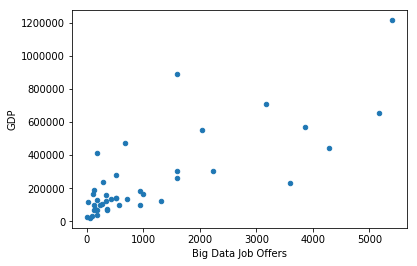

In [149]:
merge.plot.scatter(x='Big Data Job Offers',y='GDP')

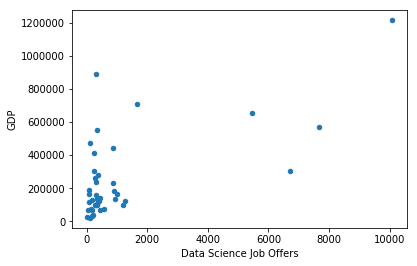

In [150]:
merge.plot.scatter(x='Data Science Job Offers',y='GDP')

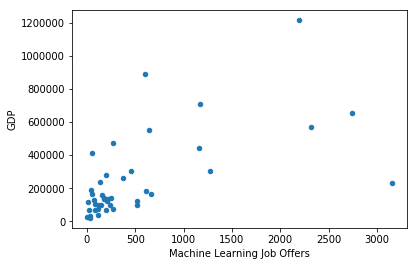

In [151]:
merge.plot.scatter(x='Machine Learning Job Offers',y='GDP')

In [152]:
europe_merge = pd.merge(europedf, gdp_df, how='inner', on='City')
usa_merge = pd.merge(usadf, gdp_df, how='inner', on='City')
latam_merge = pd.merge(latamdf, latam_cities_gdp, how='inner', on='City')

In [153]:
europe_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1318.0,1273.0,516.0,3107.0,121289.27
1,Barcelona,435.0,354.0,174.0,963.0,135803.15
2,Berlin,995.0,1011.0,667.0,2673.0,165376.72
3,Brussels,717.0,925.0,221.0,1863.0,134939.93
4,Budapest,274.0,354.0,80.0,708.0,102939.82
5,Cardiff,57.0,107.0,28.0,192.0,20212.78
6,Copenhagen,132.0,268.0,126.0,526.0,98431.89
7,Dublin,570.0,1191.0,242.0,2003.0,95902.65
8,Stockholm,340.0,394.0,213.0,947.0,124384.82
9,Frankfurt,511.0,381.0,180.0,1072.0,143516.43


In [154]:
#Correlacion por el total de ofertas de trabajo
print('Total:', europe_merge['Total New Tech Job Offers'].corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', europe_merge['Big Data Job Offers'].astype('int').corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', europe_merge['Data Science Job Offers'].astype('int').corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', europe_merge['Machine Learning Job Offers'].astype('int').corr(europe_merge['GDP']))

Total: 0.8265705777570417
Big Data: 0.8866971772413363
Data Science: 0.7423042704648751
Machine Learning: 0.8209280417647306


In [155]:
total_europe = europe_merge['Total New Tech Job Offers'].sum()
total_europe

44728.0

In [156]:
usa_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Atlanta,1599.0,265.0,371.0,2235.0,263711.72
1,Austin,938.0,349.0,517.0,1804.0,96379.31
2,Boston,2234.0,6702.0,1271.0,10207.0,305833.34
3,Chicago,2045.0,333.0,640.0,3018.0,554230.82
4,Dallas,1596.0,225.0,454.0,2275.0,304270.25
5,Houston,674.0,98.0,269.0,1041.0,470838.44
6,Los Angeles,1592.0,306.0,597.0,2495.0,891793.72
7,New York,5397.0,10074.0,2196.0,17667.0,1215233.96
8,San Francisco,3867.0,7657.0,2314.0,13838.0,568072.44
9,Seattle,3593.0,853.0,3153.0,7599.0,231514.38


In [157]:
#Correlacion por el total de ofertas de trabajo
print('Total:', usa_merge['Total New Tech Job Offers'].corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', usa_merge['Big Data Job Offers'].astype('int').corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', usa_merge['Data Science Job Offers'].astype('int').corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', usa_merge['Machine Learning Job Offers'].astype('int').corr(usa_merge['GDP']))

Total: 0.5337637785215862
Big Data: 0.5128208206637319
Data Science: 0.5378136587466197
Machine Learning: 0.2014171622821191


In [158]:
total_usa = usa_merge['Total New Tech Job Offers'].sum()
total_usa

68489.0

In [159]:
latam_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP per capita,GDP
0,Belo Horizonte,15.0,11.0,11.0,37.0,20134,112665.84
1,Bogota,61.0,64.0,11.0,136.0,21497,196392.29
2,Buenos Aires,185.0,187.0,155.0,527.0,35906,555889.51
3,Guadalajara,175.0,167.0,82.0,424.0,14206,66593.47
4,Lima,26.0,18.0,15.0,59.0,15530,165769.02
5,Mexico City,190.0,234.0,49.0,473.0,16239,373118.63
6,Rio de Janeiro,19.0,18.0,13.0,50.0,23176,288777.60
7,Santiago,102.0,61.0,49.0,212.0,28929,207258.93
8,Sao Paulo,341.0,333.0,118.0,792.0,25650,534738.38


In [160]:
#Correlacion por el total de ofertas de trabajo
print('Total:', latam_merge['Total New Tech Job Offers'].corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', latam_merge['Big Data Job Offers'].astype('int').corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', latam_merge['Data Science Job Offers'].astype('int').corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', latam_merge['Machine Learning Job Offers'].astype('int').corr(latam_merge['GDP']))

Total: 0.7137479028661143
Big Data: 0.6695436090138939
Data Science: 0.6912077083588487
Machine Learning: 0.7168572156844988


In [161]:
total_latam = latam_merge['Total New Tech Job Offers'].sum()
total_latam

2710.0

In [162]:
total = total_europe + total_usa + total_latam
total

115927.0

In [163]:
europe_perc = (total_europe*100)/total
usa_perc = (total_usa*100)/total
latam_perc = (total_latam*100)/total
print('Trabajos ofertados en Europa representan el %.2f porciento de trabajos en el dataset'%europe_perc)
print('Trabajos ofertados en USA representan el %.2f porciento de trabajos en el dataset'%usa_perc)
print('Trabajos ofertados en Latino America representan el %.2f porciento de trabajos en el dataset'%latam_perc)

Trabajos ofertados en Europa representan el 38.58 porciento de trabajos en el dataset
Trabajos ofertados en USA representan el 59.08 porciento de trabajos en el dataset
Trabajos ofertados en Latino America representan el 2.34 porciento de trabajos en el dataset


TEXT ANALYSIS

In [164]:
import glob
europe_files = glob.glob('data/Europe/*.csv')
usa_files = glob.glob('data/USA/*.csv')
latam_files = glob.glob('data/Latin America/*.csv')

In [165]:
import nltk
my_stpwrds = ['big','data','machine','learning','science','jobs','job','non']
stpwrds = nltk.corpus.stopwords.words('english')
stpwrds_es = nltk.corpus.stopwords.words('spanish')
stpwrds_fr = nltk.corpus.stopwords.words('french')
stopwords = set(stpwrds+stpwrds_es+stpwrds_fr+my_stpwrds)

In [166]:
cities_eu = []

In [167]:
europe_dfdic = {}
for f in europe_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    if data[0] not in cities_eu:
        cities_eu.append(data[0])
    city_job = ' '.join(data)
    europe_dfdic[city_job] = pd.read_csv(f)

In [168]:
cities_usa = []

In [169]:
usa_dfdic = {}
for f in usa_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    city = ""
    if len(data) > 3:
        city = data[0]+" "+data[1]
    else:
        city = data[0]
    if city not in cities_usa:
        cities_usa.append(city)
    city_job = ' '.join(data)
    usa_dfdic[city_job] = pd.read_csv(f)

In [170]:
cities_latam = []

In [206]:
latam_dfdic = {}
for f in latam_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    city = ""
    if len(data) > 3:
        city = data[0]+" "+data[1]
    else:
        city = data[0]
    if city not in cities_latam:
        cities_latam.append(city)
    city_job = ' '.join(data)
    latam_dfdic[city_job] = pd.read_csv(f)

In [207]:
from string import punctuation
from wordcloud import WordCloud

In [221]:
def foo(cities,regdic):
    dic = {}
    for city in cities:
        summaries = []
        for k in regdic:
            n = k.split(" ")
            if city in k:
                for i in range(regdic[k]['summary'].count()):
                    words = regdic[k]['summary'][i].split(' ')
                    for word in words:
                        w = word.lower().rstrip(punctuation)
                        summaries.append(w)
        dic[city] = summaries
    return dic

In [222]:
foo(cities_latam,latam_dfdic)

{'Guadalajara': ['',
  'manage',
  'data',
  'networks',
  'and',
  'administrate',
  'and',
  'maintain',
  'data',
  'networks',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'internet',
  'of',
  'things',
  'to',
  'mobile',
  '',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'internet',
  'of',
  'things',
  'to',
  'mobile',
  'financial',
  'services',
  'billing',
  'and',
  'operational',
  'support',
  'systems',
  'we',
  'are',
  '',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'internet',
  'of',
  'things',
  'to',
  'mobile',
  'financial',
  'services',
  'billing',
  'and',
  'operational',
  'support',
  'systems',
  'we',
  'are',
  '',
  'knowledge',
  'on',
  'couchbase',
  'and',
  'big',
  'data',
  'is',
  'a',
  'plus',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'i

In [223]:
# devuelve word cloud por region
def make_wc(dic,stopwords):
    list_of_summaries = []
    for k in dic:
        for i in range(len(dic)):
            words = dic[k]['summary'][i].split(' ')
            for word in words:
                w = word.lower().rstrip(punctuation)
                list_of_summaries.append(w)

    wc = WordCloud(stopwords=stopwords, width=1000, height=500).generate(" ".join(set(list_of_summaries)))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # wc.to_image().show()
    return wc

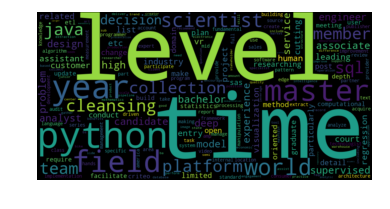

In [229]:
wc_usa = make_wc(usa_dfdic,stopwords)

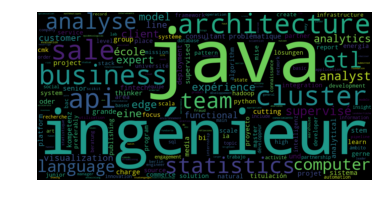

In [230]:
wc_europe = make_wc(europe_dfdic,stopwords)

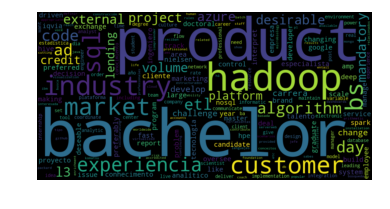

In [231]:
wc_latam = make_wc(latam_dfdic,stopwords)

In [232]:
usa_set = set(wc_usa.words_.keys())
eu_set = set(wc_europe.words_.keys())
latam_set = set(wc_latam.words_.keys())

In [233]:
words_in_all = set.intersection(usa_set,eu_set,latam_set)

In [234]:
def inter_dict(word_set,d1,d2,d3):
    dic = {}
    for word in word_set:
        dic[word] = (d1[word],d2[word],d3[word])
    return dic

In [235]:
word_dic = inter_dict(words_in_all, wc_usa.words_, wc_europe.words_, wc_latam.words_)

In [236]:
df = pd.DataFrame(word_dic,index=['USA','Europe','Latam'])
df = df.T

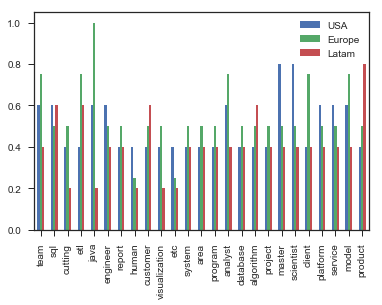

In [238]:
ax = df.plot.bar()

LINEAR REGRESSION

In [239]:
pop = pd.read_csv('data/PEP_2012_PEPANNRSIP.US12A_with_ann.csv',header = [0,1])

In [240]:
pop.head()

GEO.id GEO.id2 GEO.display-label GC_RANK.target-geo-id  \
          Id     Id2         Geography         Target Geo Id   
0  0100000US     NaN     United States      1620000US3651000   
1  0100000US     NaN     United States      1620000US0644000   
2  0100000US     NaN     United States      1620000US1714000   
3  0100000US     NaN     United States      1620000US4835000   
4  0100000US     NaN     United States      1620000US4260000   

  GC_RANK.target-geo-id2 GC_RANK.rank-label  \
          Target Geo Id2               Rank   
0                3651000                  1   
1                 644000                  2   
2                1714000                  3   
3                4835000                  4   
4                4260000                  5   

                             GC_RANK.display-label  \
                                         Geography   
0          United States - New York city, New York   
1     United States - Los Angeles city, California   
2           United States - Chicago city, Illinois   
3              United States - Houston city, Texas   
4  United States - Philadelphia city, Pennsylvania   

                                           rescensus42010  \
                       Geography.1 April 1, 2010 - Census   
0          New York city, New York                8175133   
1     Los Angeles city, California                3792621   
2           Chicago city, Illinois                2695598   
3              Houston city, Texas                2099451   
4  Philadelphia city, Pennsylvania                1526006   

                    resbase42010                               respop72010  \
  April 1, 2010 - Estimates Base Population Estimate (as of July 1) - 2010   
0                        8175136                                   8189997   
1                        3792627                                   3795781   
2                        2695598                                   2697843   
3                        2097217                                   2102680   
4                        1526006                                   1528458   

                                respop72011  \
  Population Estimate (as of July 1) - 2011   
0                                   8269639   
1                                   3823316   
2                                   2705248   
3                                   2126196   
4                                   1538567   

                                respop72012  
  Population Estimate (as of July 1) - 2012  
0                                   8336697  
1                                   3857799  
2                                   2714856  
3                                   2160821  
4                                   1547607

In [241]:
pop.drop(pop.columns[[0,1,2,3,4,5,6,8,9,10,11]], axis=1, inplace=True)
pop.columns = ['City','Population']

In [242]:
def change_name(x):
    name = x['City'].split(",")
    city = name[0].split(" ")
    city.pop(-1)
    return ' '.join(city)

In [243]:
pop['City'] = pop.apply(change_name, axis=1)

In [244]:
pop.head()

,City,Population
0,New York,8336697
1,Los Angeles,3857799
2,Chicago,2714856
3,Houston,2160821
4,Philadelphia,1547607


In [245]:
usa_merge = pd.merge(usa_merge, pop, how='inner', on='City')

In [246]:
usa_merge['GDP per Capita'] = usa_merge.apply(lambda x : x['GDP']/x['Population'], axis=1)

KeyError: ('Population', 'occurred at index 0')

In [248]:
usa_merge.head()

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP,Population_x,GDP per Capita,Population_y
0,Atlanta,1599.0,265.0,371.0,2235.0,263711.72,443775,0.594246,443775
1,Austin,938.0,349.0,517.0,1804.0,96379.31,842592,0.114384,842592
2,Boston,2234.0,6702.0,1271.0,10207.0,305833.34,636479,0.480508,636479
3,Chicago,2045.0,333.0,640.0,3018.0,554230.82,2714856,0.204147,2714856
4,Dallas,1596.0,225.0,454.0,2275.0,304270.25,1241162,0.245150,1241162


In [249]:
import numpy as np

In [250]:
merge.index = merge['City']
merge.drop(columns=['City'],inplace=True)

KeyError: 'City'

In [251]:
log_merge = merge.apply(lambda x : np.log(x),axis=1)

In [252]:
log_merge.head()

,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
City,,,,,
Amsterdam,7.183871,7.149132,6.246107,8.041413,11.705934
Atlanta,7.377134,5.579730,5.916202,7.711997,12.482612
Austin,6.843750,5.855072,6.248043,7.497762,11.476047
Barcelona,6.075346,5.869297,5.159055,6.870053,11.818962
Berlin,6.902743,6.918695,6.502790,7.890957,12.015981


In [253]:
merge.head()

,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
City,,,,,
Amsterdam,1318.0,1273.0,516.0,3107.0,121289.27
Atlanta,1599.0,265.0,371.0,2235.0,263711.72
Austin,938.0,349.0,517.0,1804.0,96379.31
Barcelona,435.0,354.0,174.0,963.0,135803.15
Berlin,995.0,1011.0,667.0,2673.0,165376.72


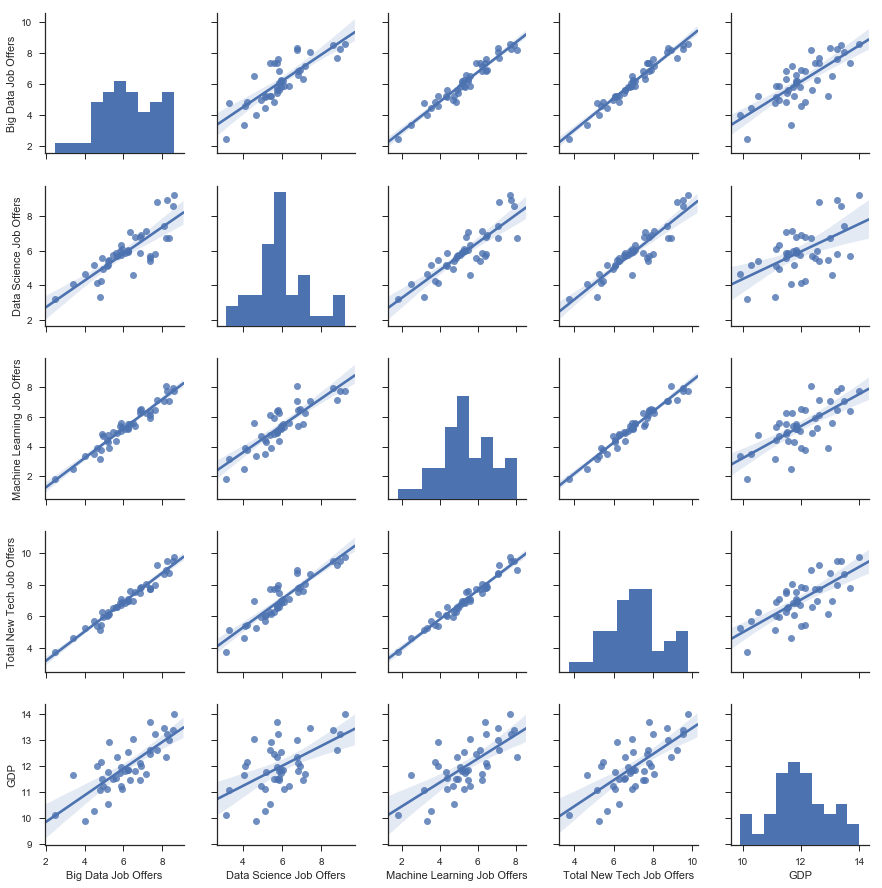

In [254]:
# Exploratory analysis
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(log_merge, kind="reg")

In [255]:
X = log_merge.iloc[:, 0:4].values
X2 = log_merge.iloc[:, 0].values
X3 = log_merge.iloc[:, 1].values
X4 = log_merge.iloc[:, 2].values
X5 = log_merge.iloc[:, 3].values
Y = log_merge.iloc[:, -1].values

In [256]:
len(X2)

42

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def createPlot(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    t = X_train.shape
    if len(t) == 1:
        X_train = X_train[np.newaxis].T
        X_test = X_test[np.newaxis].T
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)

    plt.scatter(X_test, Y_test, color='green')
    plt.plot(X_test, Y_pred, color='black')

    plt.show()

In [ ]:
createPlot(X2,Y)

In [ ]:
createPlot(X3,Y)

In [ ]:
createPlot(X4,Y)

In [ ]:
createPlot(X5,Y)

In [ ]:
import statsmodels.regression.linear_model as sm
from statsmodels.tools.tools import add_constant

In [ ]:
def createStatsmodel(X,Y):
    X_opt = add_constant(X, prepend=True)
    regressor_ols = sm.OLS(endog=Y, exog=X_opt).fit()
    initial_summary = regressor_ols.summary()
    pvalues = regressor_ols.pvalues
    
    while max(pvalues > 0.05):
        max_index = np.argmax(pvalues)
        X_opt = np.delete(X_opt, max_index, axis=1)
        regressor_ols = sm.OLS(endog=Y, exog=X_opt).fit()
        pvalues = regressor_ols.pvalues
    
    return regressor_ols.summary()

In [ ]:
createStatsmodel(X,Y)

In [ ]:
createStatsmodel(X2,Y)

In [ ]:
createStatsmodel(X3,Y)

In [ ]:
createStatsmodel(X4,Y)

In [ ]:
createStatsmodel(X5,Y)